## Input Parameters

In [19]:

#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

# Import all the libraries needed
from import_dep import *
# Import custom plot style and colorbar functions
from Functions_style import set_plot_style, add_colorbar, generate_colormaps_and_normalizers, add_slide, sample_tag_gen
# Import the data import functions 
from Class_Import import PPMSData, import_ppms_data, import_all_datasets
# Import the general functions
from Functions_General import extract_ctf, magnetoresistance, update_plot_string, filter_data
# Import the functions for VDP processing
from Functions_VDP import vdp_resistivity, vdp_hall
# Import the functions used for HallBar processing
from Functions_HallBar import hallbar_resistivity, hallbar_hall

# import the fitting functions
from Functions_Fitting import poly_to_string


### Plotting and Output Variables 
export_data = False# set to True to export the data to a powerpoint presentation and as svg files and export to path_out
powerpoint_string = 'LSMO' # string to be added to the powerpoint file name
fig_format = 'svg' # format of the figure to be saved
plot_transparency = True # set to True to make the data plots transparent
error_shade = True # set to True to plot the error bars as shaded regions else they are plotted as lines
fig_list = [] # Create a list to flexibly store tuples with the (figure, filename, title) for later exporting
ohm_m = 1 #set to 1 to force ohm-m units 0 to keep micro ohm cm units



# Custom Scence style settings for figures
fig_size = set_plot_style(export_data = export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])

# Import all the raw measured data for VDP and HallBar
dat_raw_vdp, dat_raw_hb = import_all_datasets()

File 1 imported: JT029_SrRuO3_silver_Combined with shape (650, 5, 6)
File 2 imported: JT029_SrRuO3_silver_Combined4 with shape (7920, 5, 6)
File 3 imported: JT029_SrRuO3_silver_Combined_fullrange.txt with shape (850, 5, 6)
File 4 imported: JT029_SrRuO3_silver_HallRun1 with shape (72, 5, 6)
File 5 imported: JT029_SrRuO3_silver_Halltest2 with shape (68, 5, 6)
File 1 imported: HC003_BaSnO3_STO_061124_Hall with shape (3024, 5, 6)
File 1 imported: YF042_HfO2_STO_nosilver_Hall_2 with shape (3660, 5, 6)
File 2 imported: YF042_HfO2_STO_silver_Hall_3 with shape (2970, 5, 6)
File 3 imported: YF042_HfO2_STO_silver_Hall_5 with shape (2508, 5, 6)
File 4 imported: YF042_HfO2_STO_silver_Hall_6 with shape (2442, 5, 6)
File 5 imported: YF042_HfO2_STO_silver_Hall_7 with shape (3080, 5, 6)
Could not read headers to check for rotator in file: YFW042_HZO_IV_resistivity.png, 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
Error with file: YFW042_HZO_IV_resistivity.png, 'utf-8' codec c

## Select Data for Plotting ***********************************************

In [20]:
# First visualise the data contained in each list
for count, dat in enumerate(dat_raw_vdp + dat_raw_hb):
    print(f'dat_{count}:', [f'{count_2}={d.filename}' for count_2, d in enumerate(dat)])


# Select the data sets to be plotted and put into a single list

#dat_raw_sel = [dat_raw_vdp[0][2], dat_raw_vdp[0][0], dat_raw_vdp[0][1]] # JT029
#dat_raw_sel = [dat_raw_vdp[20][0],dat_raw_vdp[20][5]] # JT082

#dat_raw_sel = [dat_raw_vdp[3][1]] # DR001
#dat_raw_sel = [dat_raw_vdp[4][5], dat_raw_vdp[4][7], dat_raw_vdp[4][9]] # , dat_raw_vdp[4][10], dat_raw_vdp[4][11],dat_raw_vdp[4][12]] # DR003
#dat_raw_sel = [dat_raw_vdp[3][0],dat_raw_vdp[3][1], dat_raw_vdp[3][2], dat_raw_vdp[3][3]] # DR004
#dat_raw_sel = [ dat_raw_vdp[17][4], dat_raw_vdp[17][0],dat_raw_vdp[17][3],dat_raw_vdp[17][2]] #dat_raw_vdp[17][1],  dat_raw_vdp[17][0],   ] # DR009
#dat_raw_sel = [dat_raw_vdp[18][0], dat_raw_vdp[18][3] ] # DR010
#dat_raw_sel = [dat_raw_vdp[21][0]] # DR011
#dat_raw_sel = [ dat_raw_vdp[19][4], dat_raw_vdp[19][3], dat_raw_vdp[19][2]]#, dat_raw_vdp[19][0]] # DR012
#dat_raw_sel = [ dat_raw_vdp[21][0], dat_raw_vdp[19][4], dat_raw_vdp[19][3], dat_raw_vdp[17][4] , dat_raw_vdp[18][1],dat_raw_vdp[18][3],dat_raw_vdp[18][0], dat_raw_vdp[14][5], dat_raw_vdp[14][1], dat_raw_vdp[14][7]] # DR Combined

#dat_raw_sel = [dat_raw_vdp[2][3] , dat_raw_vdp[2][2],  dat_raw_vdp[2][4], dat_raw_vdp[2][1]] # YFW042
#dat_raw_sel = [dat_raw_vdp[8][1], dat_raw_vdp[8][2]]    #,dat_raw_vdp[2][4],dat_raw_vdp[2][5]] YFW044
#dat_raw_sel = [ dat_raw_vdp[9][1], dat_raw_vdp[9][2], dat_raw_vdp[9][4]] #YFW046
#dat_raw_sel = [dat_raw_vdp[2][1], dat_raw_vdp[2][2], dat_raw_vdp[2][3], dat_raw_vdp[2][4], dat_raw_vdp[8][1], dat_raw_vdp[8][2], dat_raw_vdp[9][4]] # YFW Combined

#dat_raw_sel = dat_raw_vdp[1] # HC003
#dat_raw_sel = [dat_raw_vdp[10][0], dat_raw_vdp[10][4]] # HC011 ********* THE CURRENT IS INVERTED FOR THIS SAMPLE!!! **********
#dat_raw_sel = [dat_raw_vdp[11][0],dat_raw_vdp[11][4]] #,dat_raw_vdp[11][5]] # HC013
#dat_raw_sel = [dat_raw_vdp[12][3], dat_raw_vdp[12][0],dat_raw_vdp[12][1],dat_raw_vdp[12][2]] # HC014
#dat_raw_sel = [dat_raw_vdp[15][1], dat_raw_vdp[15][3],dat_raw_vdp[15][6], ] #HC016
#dat_raw_sel = [dat_raw_vdp[16][1]]  #HC015
#dat_raw_sel = [dat_raw_vdp[15][1], dat_raw_vdp[11][0],dat_raw_vdp[11][4],dat_raw_vdp[10][0], dat_raw_vdp[10][4],dat_raw_vdp[16][1]] # HC Combined

# 2DEG combined
#dat_raw_sel = [dat_raw_vdp[20][0],dat_raw_vdp[18][1],dat_raw_vdp[18][3],dat_raw_vdp[18][0],dat_raw_vdp[17][4],dat_raw_vdp[10][0], dat_raw_vdp[10][4], dat_raw_vdp[4][7], dat_raw_vdp[2][4], dat_raw_vdp[2][1], dat_raw_vdp[8][1],dat_raw_vdp[9][4], dat_raw_vdp[11][0],dat_raw_vdp[11][4],dat_raw_vdp[14][1],dat_raw_vdp[16][1], dat_raw_vdp[15][1]] 


#dat_raw_sel = [dat_raw_vdp[13][5], dat_raw_vdp[13][2], dat_raw_vdp[13][3]] # DV127
#dat_raw_sel = [dat_raw_hb[1][0], dat_raw_hb[0][1]] # DV127 hallbar

#dat_raw_sel = [  dat_raw_vdp[14][7],dat_raw_vdp[19][3]] # DR low oxygen double layer comparison $O_2$ - 700°C, 2h
#dat_raw_sel = [ dat_raw_vdp[17][2], dat_raw_vdp[18][2],  dat_raw_vdp[14][7]] #,DR O2 growth comparison 0.13mbar $O_2$ $BaSnO_3$
#dat_raw_sel = [ dat_raw_vdp[16][1], dat_raw_vdp[18][2],  dat_raw_vdp[14][7], dat_raw_vdp[19][3]] #O2 growth comparison 0.13mbar $O_2$ $BaSnO_3$

#dat_raw_sel =  [dat_raw_vdp[14][5], dat_raw_vdp[14][1], dat_raw_vdp[14][7]] # DR008a $O_2$ - 700°C, 2h

#dat_raw_sel = [dat_raw_vdp[17][2], dat_raw_vdp[17][6],  dat_raw_vdp[17][0]] # Silver contamination - HC011 vs DR009 before/after

#dat_raw_sel = [dat_raw_vdp[23][3]]#,dat_raw_vdp[23][1]] # SR003_S - high hydrogen


#dat_raw_sel = [dat_raw_vdp[17][13], dat_raw_vdp[17][15], dat_raw_vdp[17][14] ] # DR009 1.8K rotation vs sweep of field



#dat_raw_sel = [dat_raw_vdp[22][9], dat_raw_vdp[22][15]] # HC011 aged, HC011 annealed, DR009 aged, DR009 annealed
#dat_raw_sel = [dat_raw_vdp[17][1], dat_raw_vdp[17][13]] # DR009 aged, DR009 $N_2$ - 700°C, 2h

#dat_raw_sel = [dat_raw_vdp[10][0], dat_raw_vdp[17][2]  ] # HC011 initial vs DR009 initial 0.13mBar $O_2$ LSO/BSO/STO

#dat_raw_sel = [dat_raw_vdp[9][4]] # YFW 046 STO/HZO 2DEG

#dat_raw_sel = [dat_raw_vdp[26][3], dat_raw_vdp[25][0], dat_raw_vdp[17][2],  dat_raw_vdp[14][7]]# HC017 0.13mbar $O_2$ $BaSnO_3$ - inverted

#### Ageing
#dat_raw_sel = [dat_raw_vdp[17][2], dat_raw_vdp[17][6], dat_raw_vdp[17][1]]# DR009: after fabrication, after 10 days, after 37 days
#dat_raw_sel = [dat_raw_vdp[10][0],  dat_raw_vdp[22][9]]# HC011 initial, aged and cleaned

###### Water soaking
#dat_raw_sel = [ dat_raw_vdp[22][15], dat_raw_vdp[22][17], dat_raw_vdp[22][20]  ] #HC011 1. initial, 2.$H_2O$ for 0.5 hr, 3. $H_2O$ for 30 hr
#dat_raw_sel = [ dat_raw_vdp[15][1], dat_raw_vdp[15][6],dat_raw_vdp[15][7]] #HC016 1. initial 2. $H_2O$ for 4 hr 3. $H_2O$ for 30hr


#LSMO
dat_raw_sel = [dat_raw_vdp[29][4], dat_raw_vdp[29][6]] #YC001
               
               
mag_dat = dat_raw_sel
print('dat_raw_sel:', [f'{count}={d.filename}' for count, d in enumerate(dat_raw_sel)])


dat_0: ['0=JT029_SrRuO3_silver_Combined', '1=JT029_SrRuO3_silver_Combined4', '2=JT029_SrRuO3_silver_Combined_fullrange.txt', '3=JT029_SrRuO3_silver_HallRun1', '4=JT029_SrRuO3_silver_Halltest2']
dat_1: ['0=HC003_BaSnO3_STO_061124_Hall']
dat_2: ['0=YF042_HfO2_STO_nosilver_Hall_2', '1=YF042_HfO2_STO_silver_Hall_3', '2=YF042_HfO2_STO_silver_Hall_5', '3=YF042_HfO2_STO_silver_Hall_6', '4=YF042_HfO2_STO_silver_Hall_7']
dat_3: ['0=DR001_LaScO3__BaSnO3_STO_201124_test1', '1=DR004_LaScO3__BaSnO3_STO_201124_combined3', '2=DR004_LaScO3__BaSnO3_STO_201124_combined4', '3=DR004_LaScO3__BaSnO3_STO_201124_combined5', '4=DR004_LaScO3__BaSnO3_STO_201124_combined6', '5=DR004_LaScO3__BaSnO3_STO_201124_test2']
dat_4: ['0=DR003_LaScO3__BaSnO3_STO_nosilver_combined1', '1=DR003_LaScO3__BaSnO3_STO_nosilver_combined2', '2=DR003_LaScO3__BaSnO3_STO_nosilver_test2', '3=DR003_LaScO3__BaSnO3_STO_nosilver_test3', '4=DR003_LaScO3__BaSnO3_STO_nosilver_test4', '5=DR003_LaScO3__BaSnO3_STO_silver_combined10', '6=DR003_LaSc

## ************************************************************************************************************************

## Extract and Check Temperature, Field, and Current values

In [21]:
# Reduced_data = [1,-5] means that the first and last 5 temperature points are removed from the data
# Reduced_temp = [3,-1] will skip the first 3 temperature points and the last 1 temperature point
# Reduced_current = 2 will skip the first 2 current points and the last 2 current points

# Extract Data - check you have the expected and correct Temperature, Field and Current values!
dat, unit_scale = extract_ctf(dat_raw_sel, Reduced_temp = False, Reduced_current=False, ohm_m=ohm_m, single_zero_field = True)

# Update a single data file with reduced temperature or current values
# dat[0] = extract_ctf([dat_raw_sel[0]], Reduced_temp = [5,0], Reduced_current=False, single_zero_field = True)[0][0]
# dat[3] = extract_ctf([dat_raw_sel[3]], Reduced_temp = [0,-5], Reduced_current=False, single_zero_field = True)[0][0]

# Generate the colormaps and normalizers for the data
[cmap_temp, cmap_field, norm_temp, norm_field, mark_p, min_temp, max_temp, min_field, max_field] = generate_colormaps_and_normalizers(dat)

# If exporting the data this ensures that the labels are updated by the user to be correct from their original "filename" assignement
if export_data == True: 
    dat = update_plot_string(dat)




run6_YC_LSMO30_002_nosilver: Field values originally in the order 0,-Bmax->0->Bmax
For file: run6_YC_LSMO30_002_nosilver
7 Currents (uA): [-180. -120.  -60.    0.   60.  120.  180.]
14 Temperatures (K): [342. 322. 302. 282. 262. 242. 222. 202. 182. 162. 142. 122. 102.  82.]
13 Fields (kOe): [-90. -75. -60. -45. -30. -15.  -0.  15.  30.  45.  60.  75.  90.]
Is this correct?
Warning for run8_YC_LSMO_003_gold: no recognised field order for reordering was applied.
Field values start/mid/end: 4.5668e-05, N/A, 4.5668e-05
For file: run8_YC_LSMO_003_gold
7 Currents (uA): [-180. -120.  -60.    0.   60.  120.  180.]
4 Temperatures (K): [342. 332. 322. 312.]
1 Fields (kOe): [0.]
Is this correct?


## Calculate VDP Resistivity, Magnetoresistance, Hall Coefficient and Hall Mobility


In [22]:
# Extract the resistivity using the VDP method and write to the PPMSData objects in the list "dat" - skips all non VDP data
dat = vdp_resistivity(dat, print_val = False, resistivity_guess = 0, filt_kern=0)
# Calculate the Hall coefficient and mobility - skips all non VDP data
dat = vdp_hall(dat, threshold = 3)

# Calculate the resistivity using the HallBar method and write to the PPMSData objects in the list "dat" - skips all non HallBar data
dat = hallbar_resistivity(dat, print_val = False, filt_kern=0)
# calculate the Hall coefficient and mobility - skips all non HallBar data
dat = hallbar_hall(dat, filt_kern=0)
        
# Calculate the magnetoresistance at each temperature and field strength: mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
dat = magnetoresistance(dat) 

/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Functions_VDP.py:159: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R_sheet_A = fsolve(vdp_equation, initial_guess, args=(R_32_10[0], R_20_31[0]))[0]
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Functions_VDP.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R_sheet_B = fsolve(vdp_equation, initial_guess, args=(R_01_23[0], R_13_02[0]))[0]
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Functions_VDP.py:26: RuntimeWarning: invalid value encountered in scalar divide
  dRsdRa = (np.exp(-np.pi * R_A / R_sheet) * R_sheet)/(R_A*np.exp(-np.pi * R_A / R_sheet) + R_B*np.exp(-np.pi * R_B / R_sheet))
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Functions_VDP.py:27: RuntimeWarning: invalid value encountered in scalar divide
  dRsd

## Resistivity vs Temperature

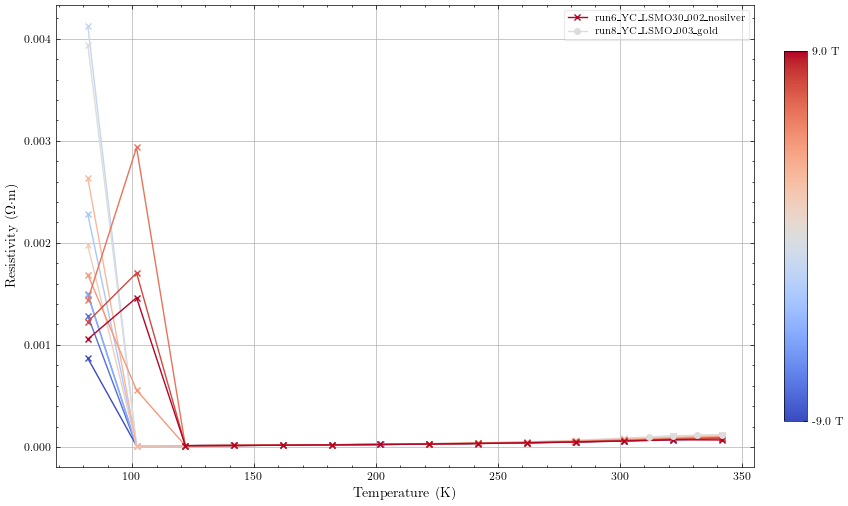

In [23]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig, gs[1], sm, min_field, max_field, fig_size)


# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the B fields
    for Bi in range(d.ctf[5]):
        
        # Plot rho_film vs Temp
        ax.plot(d.res_data[:,Bi, 0], d.res_data[:,Bi, 4] * unit_scale, marker=mark_p[j], color=cmap_field(norm_field(d.res_data[0, Bi, 1])))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color=cmap_field(norm_field(d.res_data[0, Bi, 1])), label=f'{d.plot_str}')
    
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
    #ax.set_title(f'Sheet Resistance vs Temperature')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    #ax.set_title('Resistivity vs Temperature')
    
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
    #ax.set_title('Resistivity vs Temperature')

# Add a legend
ax.legend()


#ax.set_xlim(0,3)
#ax.set_ylim(0, 2e-2)

#ax.set_yscale('log')


# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_rho_xx_vs_temperature' # name for exported figure
plot_title = 'ρ_xx vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

- Anderson localisation causes the metal insulator transition at low T
- If you have defects in film, they can have an external effect of localising charge carriers and reducing the conductivity
    - Also causes loss of metalicity beneath a certain thicknes of LSMO etc
    -  Defects localise the previously delocalised charge carriers, either due to thickness reudction or low T
    - Low thicknes its because number of defects is constant - > higher defect density
    

## Resitivity vs Temperature for B=0 ONLY

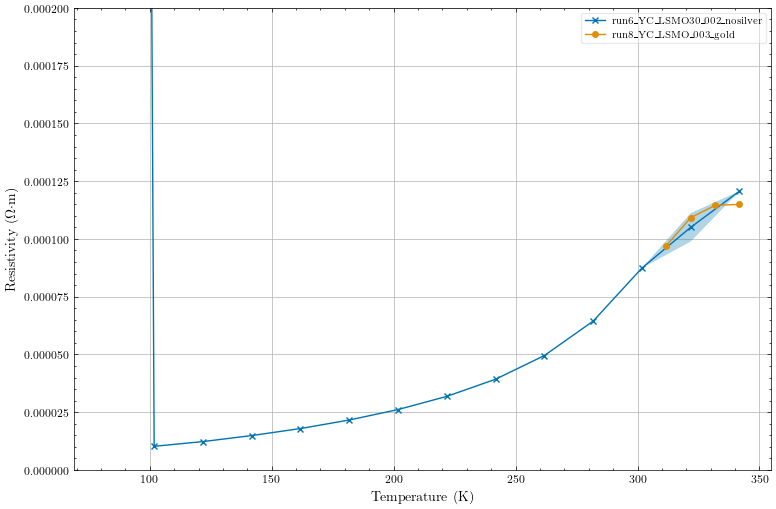

In [24]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Use the middle B field index
    for Bi in [int(d.ctf[5]/2)]:
        x = d.res_data[:, Bi, 0]
        y = d.res_data[:, Bi, 4] * unit_scale
        y_err = d.res_data[:, Bi, 5] * unit_scale
        
        if error_shade:
            # Plot the main line
            line_main, = ax.plot(x, y, '-'+mark_p[j], label=f'{d.plot_str}')
            # Match fill color to line color
            color_main = line_main.get_color()
            # Fill the region for error
            ax.fill_between(x, y - y_err, y + y_err, color=color_main, alpha=0.3, edgecolor='none')
        else:
            # Standard error bars
            ax.errorbar(x, y, yerr=y_err, fmt='-'+mark_p[j], label=f'{d.plot_str}')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')

# Add a legend
ax.legend()

# Optional axis limits or scaling
#ax.set_yscale('log')
ax.set_ylim(0,2e-4)
# Show the plot
plt.show()

    
# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_rho_xx_B0_vs_temperature' # name for exported figure
plot_title = 'ρ_xx vs T at H=0' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

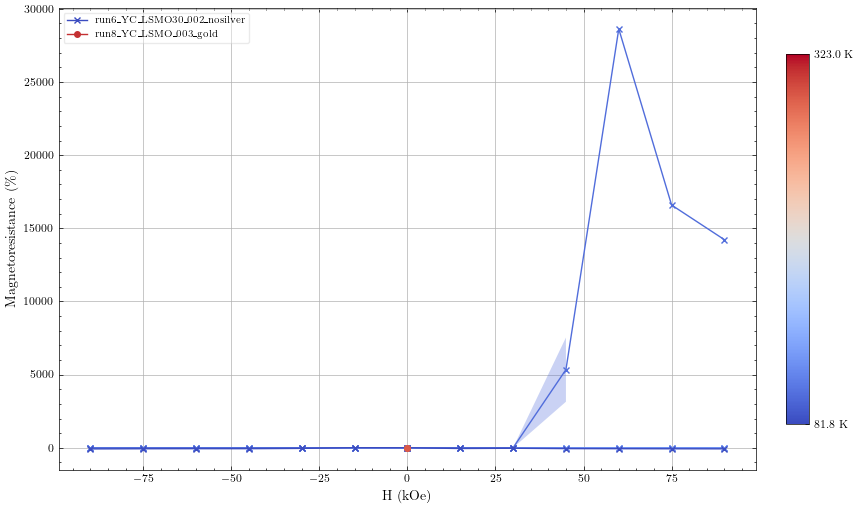

In [25]:

# Create a figure and GridSpec layout
fig = plt.figure(figsize=(fig_size[0] + fig_size[0]/9, fig_size[1]))
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

temp_limit = 323
avoid_dataset = 2
# Normalize the temperature and field values
norm_temp_mag = Normalize(vmin=min_temp, vmax=temp_limit)

for j, d in enumerate(mag_dat):
    if j != avoid_dataset:  # Skip the dataset that should not be plotted
        # Loop over the temperatures
        for Ti, T in enumerate(d.ctf[1]):
            if T < temp_limit:
                # X and Y data
                x = d.tf_av[Ti, :, 1] * 10            # Field in kOe
                y = d.mag_res[Ti, :, 2]              # MR average
                y_err = d.mag_res[Ti, :, 3]             # MR average error

                color_main = cmap_temp(norm_temp(T))

                if error_shade:
                    # Plot main line
                    ax.plot(x, y, marker=mark_p[j], color=color_main)
                    # Fill the error region
                    ax.fill_between(x, y - y_err, y + y_err, color=color_main, alpha=0.3, edgecolor='none')
                else:
                    # Standard error bars
                    ax.errorbar(x, y, yerr=y_err, marker=mark_p[j], color=color_main)

        # Add a dummy plot for the legend entry (same color as the last temperature used)
        ax.plot([], [], marker=mark_p[j], color=cmap_temp(norm_temp_mag(T)), label=f'{d.plot_str}')

ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'Magnetoresistance (\%)')
#ax.set_title('Magnetoresistance vs Field')
ax.legend()

# Add and adjust the colorbar
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp_mag)
add_colorbar(fig, gs[1], sm, min_temp, temp_limit, fig_size, field=False)


#ax.set_ylim(-10,10)

plt.show()

    
# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_magnetoresistance_vs_field' # name for exported figure
plot_title = 'Magnetoresistance vs Field Strength' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

- The longitudinal resistance exhibits a rapid decrease, attributed to weak localization (WL), a phenomenon commonly observed in  disordered semiconductor systems
- The magnetoresistance (MR) exhibited a parabolic behavior within the intermediate magnetic field range (1.5T to 4T), as illustrated in Figure 5(b). Concurrently, at the fields where SdH oscillations emerge, it indicates the onset of quantum effects that dominate over the classical parabolic behavior.

## Arhenius Plot

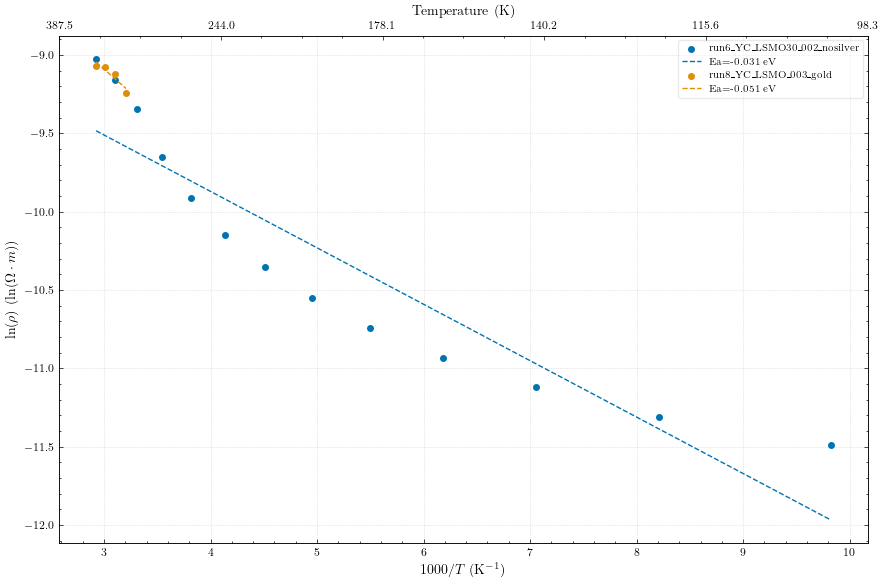

In [26]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Define Boltzmann constant
k_B = 8.617333262e-5  # Boltzmann constant in eV/K

# Loop over the data sets
for j, d in enumerate(dat):
    # Extract data: 1000/T and ln(rho or Rs)
    # Assuming Bi_zero corresponds to the desired data column (e.g., zero field)
    Bi_zero = int(d.ctf[5] / 2) 
    temp_K = d.res_data[:, Bi_zero, 0]
    rho_or_Rs = d.res_data[:, Bi_zero, 4]

    # Filter out invalid values simply (avoid division by zero or log(0))
    valid_mask = (temp_K > 0) & (rho_or_Rs > 0)
    temp_K = temp_K[valid_mask]
    rho_or_Rs = rho_or_Rs[valid_mask]

    x = 1000.0 / temp_K  # 1000/T
    y = np.log(rho_or_Rs)  # ln(rho) or ln(Rs)

    # Select the range of data for fitting (adjust the range as needed)
    # Ensure this range uses the 'x' variable (1000/T)
    fit_mask = (x > 0) & (x < 10)  # Fitting Range
    x_fit = x[fit_mask]
    y_fit = y[fit_mask]
    x = x[fit_mask]
    y = y[fit_mask]
    
    # Scatter plot of the data
    measurement_plot = ax.scatter(x, y, marker='o', label=f'{d.plot_str}')
    current_color = measurement_plot.get_facecolors()[0] # Get the color used for the scatter plot

    # Perform a linear fit only if enough points exist
    if len(x_fit) >= 2:
        coeffs = np.polyfit(x_fit, y_fit, 1)
        gradient = coeffs[0] # Slope of ln(rho) vs (1000/T)
        intercept = coeffs[1]

        # Calculate activation energy (Corrected: Ea = gradient * 1000 * k_B)
        activation_energy = gradient * 1000.0 * k_B # The key correction

        # Generate x values for the fitted line
        x_vals = np.linspace(x_fit.min(), x_fit.max(), 100)
        y_vals = np.polyval(coeffs, x_vals)

        # Plot the fitted line
        ax.plot(x_vals, y_vals, linestyle='--', color=current_color,
                label=f'Ea={activation_energy:.3f} eV') # Show Ea in label

# Set labels and title based on the first dataset's type
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
if dat and dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\ln(R_s)$  (ln($\Omega/\square$))')
else:
    ax.set_ylabel(r'$\ln(\rho)$  (ln($\Omega \cdot m$))')
#ax.set_title('Arrhenius Plot')

# Add a legend
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6) # Optional grid

# Create a secondary x-axis for Temperature (K) at the top
ax2 = ax.twiny() # Share the y-axis
xlim = ax.get_xlim()
ax2.set_xlim(xlim)

# Calculate and set ticks for the Temperature axis
num_ticks = 6
ticks_1000_T = np.linspace(xlim[0], xlim[1], num=num_ticks)
valid_ticks_1000_T = ticks_1000_T[ticks_1000_T > 1e-9] # Avoid T = infinity
valid_ticks_T = 1000.0 / valid_ticks_1000_T

ax2.set_xticks(valid_ticks_1000_T)
ax2.set_xticklabels([f'{T_val:.1f}' for T_val in valid_ticks_T])
ax2.set_xlabel('Temperature (K)')
ax2.grid(False) # No grid for the top axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_Arrhenius Plot' # name for exported figure
plot_title = 'Arrhenius Plot' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Log(R) vs Log(T)

- $0.15T$ - 3.97
$1.82T$ - 8.54


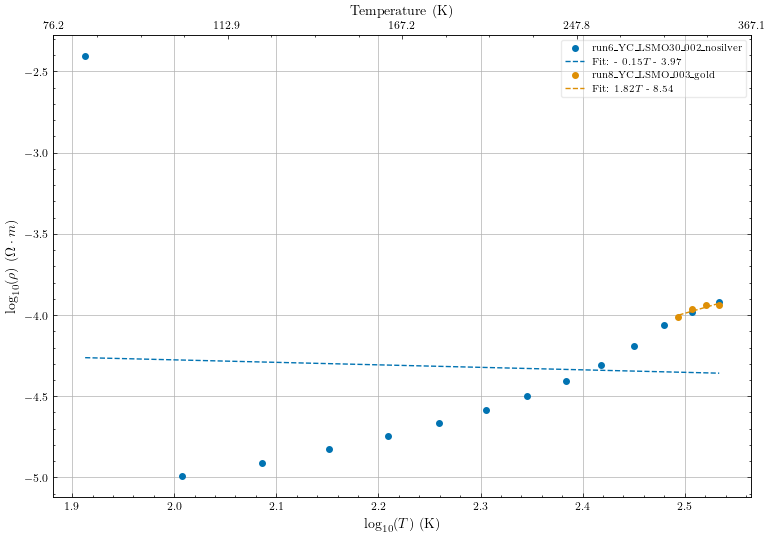

In [27]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Plot log10(rho_film) vs log10(Temp)
    Bi_zero = int(d.ctf[5]/2)
    log_T = np.log10(d.res_data[:, Bi_zero, 0])
    log_R = np.log10(d.res_data[:, Bi_zero, 4])
    measurement_plot = ax.scatter(log_T, log_R, marker='o', linestyle='-', label=f'{d.plot_str}')
    current_color = measurement_plot.get_facecolors()[0] # Get the color used for the scatter plot

    # Fit to a polynomial of order...
    poly_order = 1
    coeffs = np.polyfit(log_T, log_R, poly_order)
    
    # Convert to readable equation string
    equation = poly_to_string(coeffs)
    print(str(equation))
    
    # Generate x values for the fitted line
    x_vals = np.linspace(np.min(log_T), np.max(log_T), 100)

    # Plot with equation in label
    ax.plot(x_vals, np.polyval(coeffs, x_vals), 
            label=f'Fit: {str(equation)}', 
            linestyle='--', color=current_color )



# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel(r'$\log_{10}(T)$ (K)')

if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\log_{10}(R_s)$ ($\Omega/ \square$)')
    #ax.set_title(r'Log-Log Plot of Sheet Resistance vs Temperature')
else:
    ax.set_ylabel(r'$\log_{10}(\rho)$ ($\Omega \cdot m$)')
    #ax.set_title(r'Log-Log Plot of Resistivity vs Temperature')


# Add lines of n=1 and n=2 with best fit intercepts
x_vals = np.linspace(np.log10(min_temp), np.log10(max_temp), 100)


    
# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

#ax.set_xlim(1.2, 2.5)

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
log_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([f'{10**tick:.1f}' for tick in log_ticks])
ax2.set_xlabel('Temperature (K)')

# Disable grid lines for the secondary x-axis
ax2.grid(False)

# Show the plot
plt.show()


# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_LogR_vs_LogT' # name for exported figure
plot_title = 'Log(resitivity) vs Log(temperature)' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Hall resisitivity vs Temperature

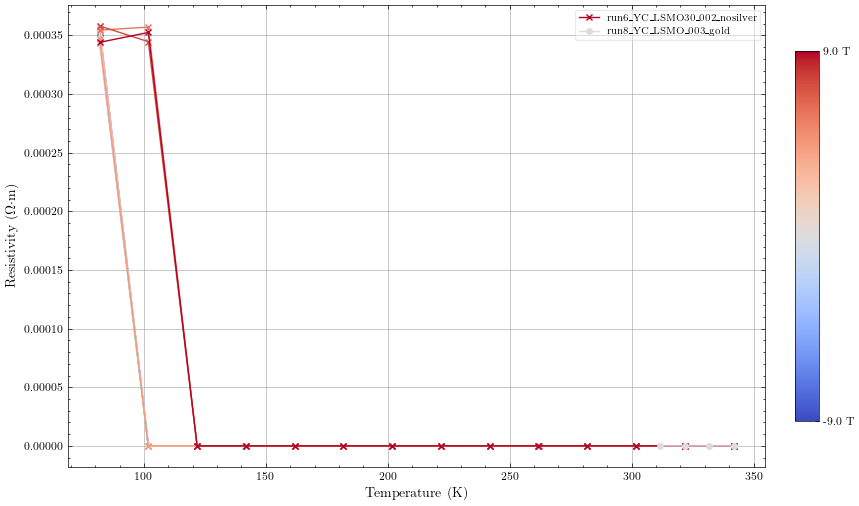

In [28]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig, gs[1], sm, min_field, max_field, fig_size)

# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the B fields
    for Bi in range(d.ctf[5]):
        # Plot rho_film vs Temp
        ax.plot(d.hall_data[:, Bi, 0], d.hall_data[:, Bi, 6] * unit_scale, marker=mark_p[j], color= cmap_field(norm_field(d.hall_data[0, Bi, 1])))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(d.hall_data[0, Bi, 1])), label=f'{d.plot_str}')
        
        
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    #ax.set_title(r'$R_{s}\{xy\}$ vs Temperature')

elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    #ax.set_title(r'$\rho_{xy}$ vs Temperature')

else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    #ax.set_title(r'$\rho_{xy}$ vs Temperature')
# Set labels and title


# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a legend
ax.legend()

# Show the plot
#ax.set_ylim(-5,5)
plt.show()


# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_rho_xy_vs_T' # name for exported figure
plot_title = 'ρ_xy vs T' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Hall Resistivity vs Field

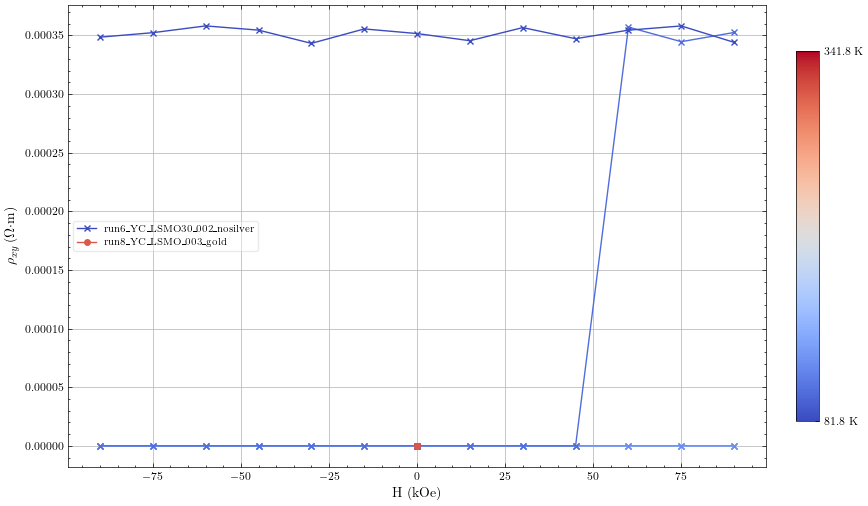

In [29]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field = False)


# Loop over the data sets
for j, d in enumerate(dat):

    for Ti, T in enumerate(d.ctf[1], start=0):
        if T > 2:

            # Plot rho_film vs Temp
            ax.plot(d.hall_data[Ti, :, 1]*10, d.hall_data[Ti, :, 6]*unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)))
            
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_temp(norm_temp(T)), label=f'{d.plot_str}')


# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('H (kOe)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    #ax.set_title(r'$R_{s}\{xy\}$' f' of {d.material} vs Applied Field')
    
elif ohm_m == 1:
    ax.set_ylabel(r'$\rho_{xy}\, (\Omega \cdot$m)')
    #ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    #ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')
    


# Add a legend
ax.legend()

#ax.set_ylim(-5e2,9e2)
# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_rho_xy_vs_field' # name for exported figure
plot_title = 'ρ_xy vs H' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Mobility and Charge Carrier Density

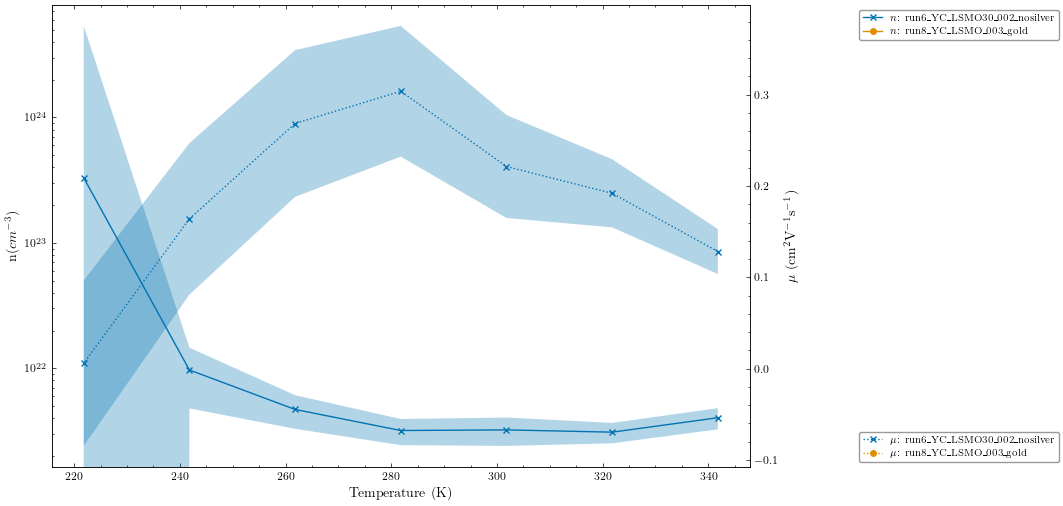

In [30]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Primary (left) y-axis
ax2 = ax.twinx()            # Secondary (right) y-axis

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$n\cdot t$' r'($cm^{-2}$)')
    n_label = r'$n\cdot t$: '
else:
    ax.set_ylabel(r'n($cm^{-3}$)')
    n_label = r'$n$: '

lower_limit = 210

# Loop over the data sets
for j, d in enumerate(dat):
    
    # temperature data
    x = d.hall_coefficient[:, 0]
    
    # Charge carrier density and error
    y_n = d.hall_coefficient[:, 7]
    y_n_err = d.hall_coefficient[:, 8]
    
    # Mobility and error
    y_mu = d.hall_coefficient[:, 9]
    y_mu_err = d.hall_coefficient[:, 10]
    
    # masking based on temperature
    fit_mask = x>lower_limit  # Fitting Range
    x = x[fit_mask]
    y_n = y_n[fit_mask]
    y_n_err = y_n_err[fit_mask]
    y_mu = y_mu[fit_mask]
    y_mu_err = y_mu_err[fit_mask]
    
    if error_shade:
        # Plot carrier density with a shaded error region
        line_n, = ax.plot(x, y_n, '-'+mark_p[j], label=f'{n_label}{d.plot_str}')
        color_n = line_n.get_color()
        ax.fill_between(x, y_n - y_n_err, y_n + y_n_err, color=color_n, alpha=0.3, edgecolor='none')

        # Plot mobility with a shaded error region
        line_mu, = ax2.plot(x, y_mu, ':'+mark_p[j], label=rf'$\mu$: {d.plot_str}')
        color_mu = line_mu.get_color()
        ax2.fill_between(x, y_mu - y_mu_err, y_mu + y_mu_err, color=color_mu, alpha=0.3, edgecolor='none')

    else:
        # Plot carrier density with error bars
        ax.errorbar(x, y_n, yerr=y_n_err, fmt='-'+mark_p[j], label=f'{n_label}{d.plot_str}')

        # Plot mobility with error bars
        ax2.errorbar(x, y_mu, yerr=y_mu_err, fmt=':'+mark_p[j], label=rf'$\mu$: {d.plot_str}')

# Configure legends
ax.legend(loc='upper left', bbox_to_anchor=(1.15, 1), framealpha=0.4, edgecolor='black', frameon=True)
ax2.legend(loc='lower left', bbox_to_anchor=(1.15, 0.0), framealpha=0.4, edgecolor='black', frameon=True)

# Set labels for the right y-axis
ax2.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')

# Disable automatic grids on both axes
ax.grid(False)
ax2.grid(False)

# Optionally set y-axis scaling
ax.set_yscale('log')
#ax.set_xlim(210,370)

# Display the plot
plt.show()

    
# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_n_u_vs_temperature' # name for exported figure
plot_title = 'Mobility and Charge Carrier Density vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Charge Carrier Density Only

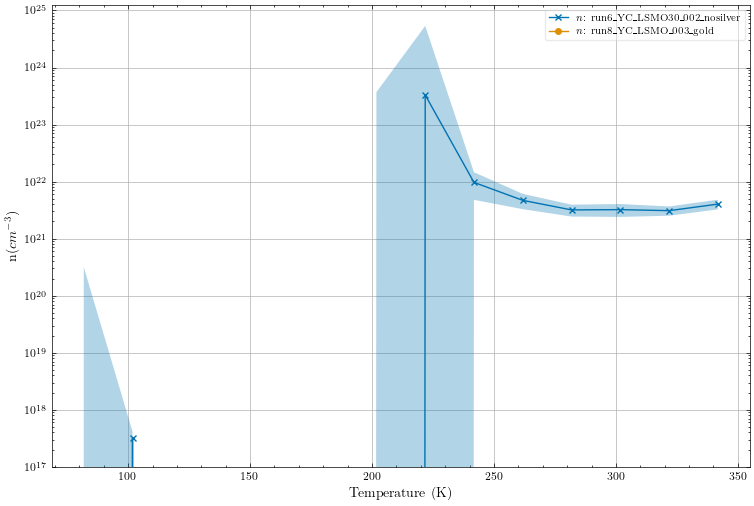

In [31]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$n\cdot t$' r'($cm^{-2}$)')
    n_label = r'$n\cdot t$: '
else:
    ax.set_ylabel(r'n($cm^{-3}$)')
    n_label = r'$n$: '

# Set the lower limit for the temperature axis
lower_limit = 0


for j, d in enumerate(dat):
    x = d.hall_coefficient[:, 0]
    y = d.hall_coefficient[:, 7]
    y_err = d.hall_coefficient[:, 8]
    
    # masking based on temperature
    fit_mask = x>lower_limit  # Fitting Range
    x = x[fit_mask]
    y = y[fit_mask]
    y_err = y_err[fit_mask]
    
    if error_shade:
        # Plot the main line first
        line_main, = ax.plot(x, y, '-'+mark_p[j], label=f'{n_label}{d.plot_str}')
        
        # Extract the line color to use for fill
        color_main = line_main.get_color()
        
        # Fill the error region
        ax.fill_between(x, y - y_err, y + y_err, color=color_main, alpha=0.3, edgecolor='none')
    else:
        # Standard error bars
        ax.errorbar(x, y, yerr=y_err, fmt='-'+mark_p[j], label=f'{n_label}{d.plot_str}')

# Add a legend for the y-axis
ax.legend()

ax.set_yscale('log')
#ax.set_ylim(1e1, 1e14)

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_n_only_vs_temperature' # name for exported figure
plot_title = 'Charge Carrier Density vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Mobility Only

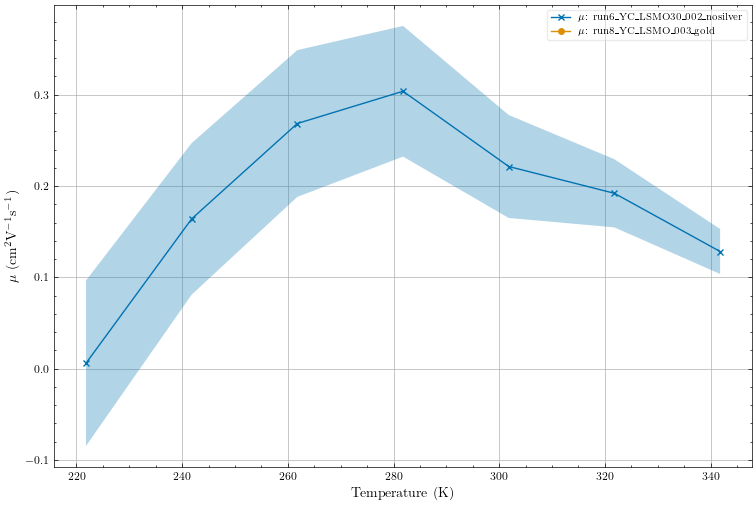

In [32]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# set limit for the temperature axis
lower_limit = 210

# Plot data on the right y-axis
for j, d in enumerate(dat, start=0):
    x = d.hall_coefficient[:, 0]
    y = d.hall_coefficient[:, 9]
    y_err = d.hall_coefficient[:, 10]
    
    # masking based on temperature
    fit_mask = x>lower_limit  # Fitting Range
    x = x[fit_mask]
    y = y[fit_mask]
    y_err = y_err[fit_mask]
    
    
    if error_shade:
        # First plot the main line
        line_main, = ax.plot(x, y, '-'+mark_p[j], label=rf'$\mu$: {d.plot_str}')
        
        # Get the line color used for this dataset
        color_main = line_main.get_color()
        
        # Then fill between (y - y_err) and (y + y_err) using the same color
        ax.fill_between(x, y - y_err, y + y_err, color=color_main, alpha=0.3, edgecolor='none')
   
    else:
        # Plot error bars
        ax.errorbar(x, y, yerr = y_err, fmt='-'+mark_p[j],  label=r'$\mu$'f': {d.plot_str}')

# Set labels for the right y-axis
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')

        
# Add a legend for the left y-axis
ax.legend()


# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_u_only_vs_temperature' # name for exported figure
plot_title = 'Mobility vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

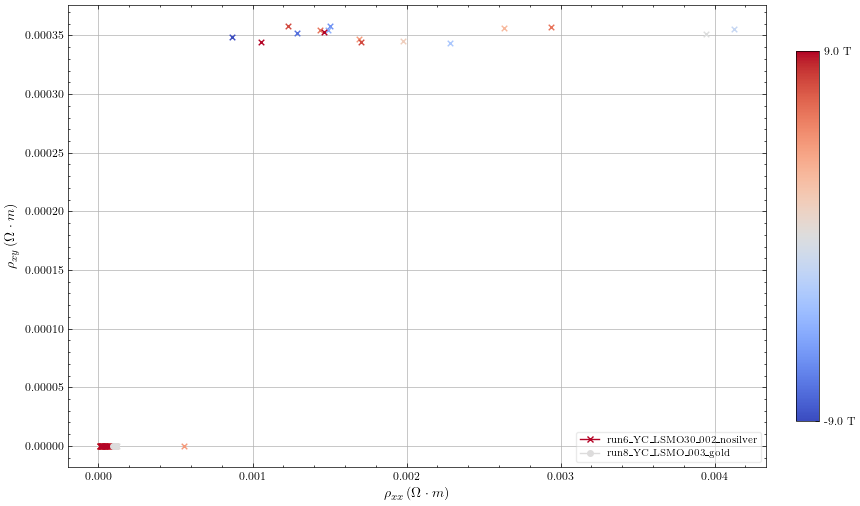

In [33]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig, gs[1], sm, min_field, max_field, fig_size)

# Loop over the data sets
for j, d in enumerate(dat, start=0):
    for Bi, B in enumerate(d.ctf[2], start=0):
        # Plot rho_film vs Temp
        ax.scatter(d.res_data[:, Bi, 4] * unit_scale, d.hall_data[:, Bi, 6] * unit_scale, marker=mark_p[j], color=cmap_field(norm_field(B)))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(B)), label=f'{d.plot_str}')

#ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\rho_{xy}\,(\Omega/\square)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\Omega/\square)$')

elif ohm_m == 1:
    ax.set_ylabel(r'$\rho_{xy}\,(\Omega \cdot m)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\Omega \cdot m)$')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')

# Add a legend
ax.legend()

# ax.set_ylim(-5,5)
# ax.set_xlim(0, 2500)

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_rho_xx_vs_rho_xy' # name for exported figure
plot_title = 'ρ_xy vs ρ_xx' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Combined Plot

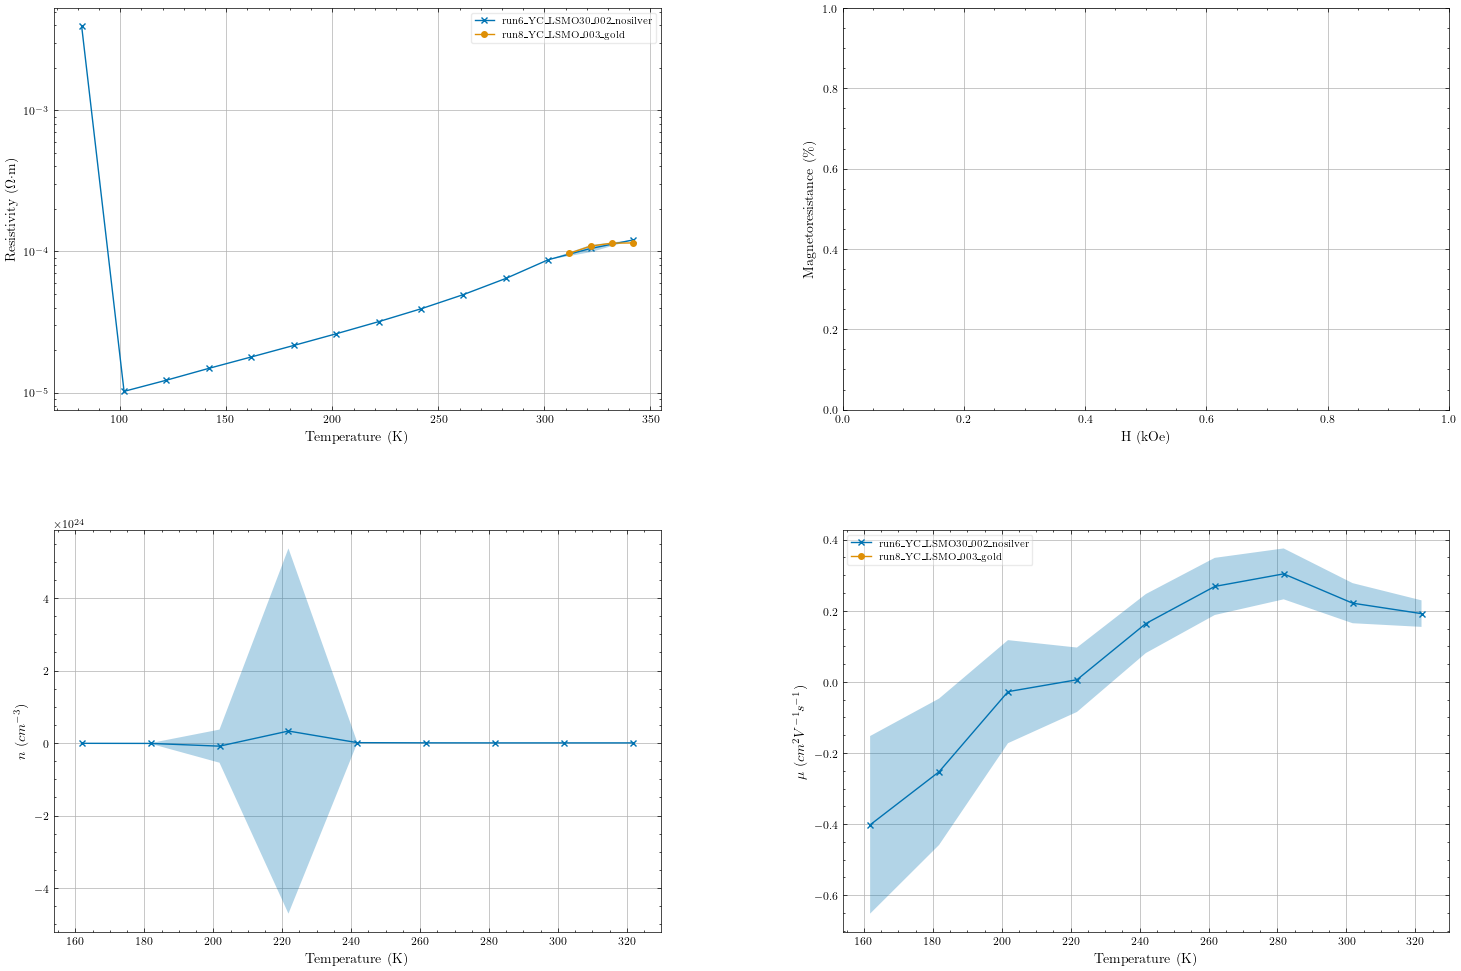

In [34]:
# Generate a figure with 4 subplots
fig = plt.figure(figsize=(fig_size[0]*2, fig_size[1]*2))
gs = gridspec.GridSpec(2, 2, wspace=0.3, hspace=0.3)

# Create axes for the four plots
ax = fig.add_subplot(gs[0])   # Resistivity (top left)
ax1 = fig.add_subplot(gs[2])  # Carrier density (bottom left)
ax2 = fig.add_subplot(gs[3])  # Mobility (bottom right)
ax3 = fig.add_subplot(gs[1])  # Magnetoresistance (top right)

# Define temperature limit for magnetoresistance plot
temp_limit = 45

# Temperature limits for all plots to force plotting within this range
temp_limit_all = 0#[100,302]

# Manual colormap and markers
cmap_colors =   sns.color_palette("colorblind", 12) #sns.color_palette("bright", 10)
color_cycler = cycler('color', cmap_colors)
color_asignment = 0 # [0, 1, 2, 0, 1, 2]
marker_asignment = 0 #[0, 0, 0, 1, 1, 1]

# Loop over all datasets once to populate all plots
for j, d in enumerate(dat):
    # Middle B field index
    Bi = int(d.ctf[5]/2)
    
    # Determine color and marker for this dataset
    if color_asignment != False:
        plot_color = cmap_colors[color_asignment[j % len(color_asignment)]]
    else:
        plot_color = None  # Use default matplotlib colors
    
    if marker_asignment != False:
        plot_marker = mark_p[marker_asignment[j % len(marker_asignment)]]
    else:
        plot_marker = mark_p[j]
    
    # --------------------------------
    # Plot 1: Resistivity vs Temperature
    # --------------------------------
    x_res = d.res_data[:, Bi, 0]
    y_res = d.res_data[:, Bi, 4] * unit_scale
    y_res_err = d.res_data[:, Bi, 5] * unit_scale
    
    if error_shade:
        # Plot main line
        if plot_color is not None:
            line_res, = ax.plot(x_res, y_res, '-'+plot_marker, color=plot_color, label=f'{d.plot_str}')
            color_res = plot_color
        else:
            line_res, = ax.plot(x_res, y_res, '-'+plot_marker, label=f'{d.plot_str}')
            color_res = line_res.get_color()
        # Shaded error
        ax.fill_between(x_res, y_res - y_res_err, y_res + y_res_err, color=color_res, alpha=0.3, edgecolor='none')
    else:
        # Standard error bars
        if plot_color is not None:
            line_res = ax.errorbar(x_res, y_res, yerr=y_res_err, fmt='-'+plot_marker, color=plot_color, label=f'{d.plot_str}')
            color_res = plot_color
        else:
            line_res = ax.errorbar(x_res, y_res, yerr=y_res_err, fmt='-'+plot_marker, label=f'{d.plot_str}')
            color_res = line_res[0].get_color()
    
    # --------------------------------
    cut_end = d.ctf[4] # end index for cutting data
    cut_start = 0 # start index for cutting data
    # Cut out some data from mobility/carrier density plot
    if j == 1:
        cut_end = d.ctf[4]-1
        cut_start = 1
    if j ==2:
        cut_end = d.ctf[4]-5
        cut_start = 1
    if j ==0:
        cut_end = -4
        cut_start = 1
    
    # elif j == 1:
    #     cut_end = d.ctf[4]-6
    # else:
    #     cut_end = d.ctf[4]-5
    # --------------------------------
    
    # --------------------------------
    # Plot 2: Carrier Density vs Temperature
    # --------------------------------
    x_n = d.hall_coefficient[cut_start:cut_end, 0]
    y_n = d.hall_coefficient[cut_start:cut_end, 7]
    y_n_err = d.hall_coefficient[cut_start:cut_end, 8]
    
    if error_shade:
        line_n, = ax1.plot(x_n, y_n, '-'+plot_marker, color=color_res, label=f'{d.plot_str}')
        ax1.fill_between(x_n, y_n - y_n_err, y_n + y_n_err, color=color_res, alpha=0.3, edgecolor='none')
    else:
        ax1.errorbar(x_n, y_n, yerr=y_n_err, fmt='-'+plot_marker, color=color_res, label=f'{d.plot_str}')
    
    # --------------------------------
    # Plot 3: Mobility vs Temperature
    # --------------------------------
    
    x_mu = d.hall_coefficient[cut_start:cut_end, 0]
    y_mu = d.hall_coefficient[cut_start:cut_end, 9]
    y_mu_err = d.hall_coefficient[cut_start:cut_end, 10]
    
    
    if error_shade:
        line_mu, = ax2.plot(x_mu, y_mu, '-'+plot_marker, color=color_res, label=f'{d.plot_str}')
        ax2.fill_between(x_mu, y_mu - y_mu_err, y_mu + y_mu_err, color=color_res, alpha=0.3, edgecolor='none')
    else:
        ax2.errorbar(x_mu, y_mu, yerr=y_mu_err, fmt='-'+plot_marker, color=color_res, label=f'{d.plot_str}')

    # --------------------------------
    # Plot 4: Magnetoresistance vs Field
    # --------------------------------
    # Normalize the temperature and field values
    norm_temp_lowT = Normalize(vmin=1.8, vmax=temp_limit)
    for Ti, T_val in enumerate(d.ctf[1]):
        if T_val < temp_limit and T_val > 0:  # Only plot temperatures below the limit
            if j != 0: #and j != 1:
                # x: field, y: MR average, optional y_err: MR error at index 3
                x_mr = d.tf_av[Ti, :, 1] * 10
                y_mr = d.mag_res[Ti, :, 2]
                y_mr_err = d.mag_res[Ti, :, 3]
                
                plot_color_mr = cmap_temp(norm_temp_lowT(T_val))
                
                if error_shade:
                    line_mr, = ax3.plot(x_mr, y_mr, marker=plot_marker, color=plot_color_mr)
                    ax3.fill_between(x_mr, y_mr - y_mr_err, y_mr + y_mr_err, color=plot_color_mr, alpha=0.3, edgecolor='none')
                else:
                    ax3.errorbar(x_mr, y_mr, yerr=y_mr_err, marker=plot_marker, color=plot_color_mr)
                    
                if j == 2:
                    ax3.plot([], [], linestyle='-', color=plot_color_mr, label=f'{T_val:.1f} K') #label=f'{d.plot_str} at {T_val:.1f} K'
                
            

# --------------------------------------------------------
# Set up axis labels and scales for all plots
# --------------------------------------------------------
# Plot 1: Resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
ax.set_yscale('log')
if temp_limit_all != 0:
    ax.set_xlim(temp_limit_all)

# Plot 2: Carrier Density
ax1.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax1.set_ylabel(r'$n\cdot t$ ($cm^{-2}$)')
else:
    ax1.set_ylabel(r'$n$ ($cm^{-3}$)')
if temp_limit_all != 0:
    ax1.set_xlim(temp_limit_all)
#ax1.set_yscale('log')

# Plot 3: Mobility
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'$\mu$ ($cm^2V^{-1}s^{-1}$)')
if temp_limit_all != 0:
    ax2.set_xlim(temp_limit_all)
#ax2.set_ylim(0,18)

# Plot 4: Magnetoresistance
ax3.set_xlabel('H (kOe)')
ax3.set_ylabel(r'Magnetoresistance (\%)')

# Add legends to each subplot
ax.legend()
#ax1.legend(frameon=True, framealpha=0.7)
# ax2.legend(frameon=True, framealpha=0.7)

ax2.legend()
#ax2.set_ylim(0,12)

# Show the plot
plt.show()


# Export Metadata 
plot_filename = f'{dat[0].sample_code}_{powerpoint_string}_combined_transport' # name for exported figure
plot_title = 'Combined Transport' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Exporting

#### Exporting All Figures as Individual Files

In [35]:
if export_data:
    for fig_obj, fig_filename, fig_title, notes in fig_list:
        save_path = Path(dat[0].directory) / Path(f"{dat[0].sample_code}_{powerpoint_string}_{fig_filename}.{fig_format}")
        fig_obj.savefig(save_path, dpi=600, bbox_inches='tight', transparent=plot_transparency)

#### Exporting to Powerpoint

In [36]:
if export_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()
    # Set slide dimensions to 16:9 widescreen (13.333 x 7.5 inches)
    [prs.slide_width, prs.slide_height] = [Inches(13.333), Inches(7.5)]

    # define the path to the output directory
    path_out = dat[0].directory

    # Add each figure to the PowerPoint presentation if it exists
    for fig, fig_filename, title, notes in fig_list:
        add_slide(fig, title, notes, prs, path_out = path_out, layout='Horizontal')

    # Save the PowerPoint presentation
    prs.save(Path(path_out) / Path(f'Publication_{dat[0].sample_code}_{powerpoint_string}.pptx'))